In [98]:
# import statements
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [41]:
# create dataframe from csv file
df = pd.read_csv('cancer patient data sets.csv')
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [43]:
# change 1s and 2s to male and female
df['Gender'] = df['Gender'].apply(lambda x: 'male' if x == 1 else 'female')

# order the dataframe by patient ids
df['Patient Id'] = df['Patient Id'].apply(lambda x: int(x[1:]))
df = df.sort_values(by=['Patient Id'], ascending=True)
df['Patient Id'] = df['Patient Id'].apply(lambda x: f'P{x}')

# fix index values
df.reset_index(drop=True, inplace=True)
df['index'] = df.index
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,male,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P2,25,female,3,1,4,3,2,3,...,3,2,2,4,2,2,3,4,3,Low
2,2,P3,35,male,4,5,6,5,6,5,...,1,4,3,2,4,6,2,4,1,Medium
3,3,P4,27,male,2,3,4,2,4,3,...,1,2,4,6,5,4,2,1,5,Medium
4,4,P5,48,male,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P996,37,female,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
996,996,P997,25,female,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
997,997,P998,18,female,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
998,998,P999,47,male,6,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High


In [44]:
# make column names lowercase
df.rename(columns=str.lower, inplace=True)

# replaces all spaces with _
# df.rename(columns={c: c.replace(' ', '_') for c in df.columns}, inplace=True)

# rename level column 
df.rename(columns={'level': 'severity of cancer'}, inplace=True)

# rename second_hand_smoke column
df.rename(columns={'passive smoker': 'second hand smoking'}, inplace=True)

df

,index,patient id,age,gender,air pollution,alcohol use,dust allergy,occupational hazards,genetic risk,chronic lung disease,...,fatigue,weight loss,shortness of breath,wheezing,swallowing difficulty,clubbing of finger nails,frequent cold,dry cough,snoring,severity of cancer
0,0,P1,33,male,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P2,25,female,3,1,4,3,2,3,...,3,2,2,4,2,2,3,4,3,Low
2,2,P3,35,male,4,5,6,5,6,5,...,1,4,3,2,4,6,2,4,1,Medium
3,3,P4,27,male,2,3,4,2,4,3,...,1,2,4,6,5,4,2,1,5,Medium
4,4,P5,48,male,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P996,37,female,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
996,996,P997,25,female,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
997,997,P998,18,female,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
998,998,P999,47,male,6,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High


Chi-Square Test for Smoking and Severity of Cancer

Ho: Smoking does not have an effect on the severity of cancer
Ha: Smoking does have an effect on the severity of cancer

In [45]:
ct = pd.crosstab(df['smoking'], df['severity of cancer'])
ct

severity of cancer,High,Low,Medium
smoking,,,
1,0,61,120
2,70,81,71
3,0,71,101
4,19,40,0
5,0,0,10
6,10,30,20
7,187,20,0
8,79,0,10


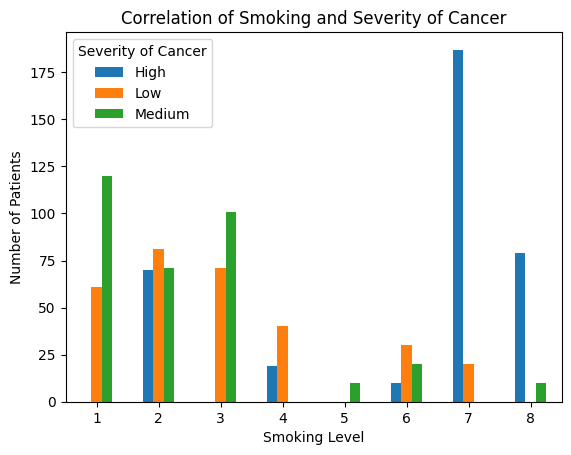

In [46]:
ct.plot(kind='bar')
plt.xlabel("Smoking Level")
plt.ylabel("Number of Patients")
plt.title("Correlation of Smoking and Severity of Cancer")

plt.legend(title="Severity of Cancer")
plt.xticks(rotation=0)
plt.show()

In [47]:
tstat, pval, dof, efreq = stats.chi2_contingency(ct)
print(pval)

5.246169667913276e-137


With a p-value of 5.25e-137, we can reject the null hypothesis since the p-value is less than alpha, 0.05. Since the p-value is very small, we can say that there is a strong relationship between smoking and lung cancer. However, conducting the test solely on the smokoing column does not account for other factors. 

To isolate smoking, we can use the patients who are in places with good air pollution, low occupational hazards, and low genetic risk. We can limit these variables since they do not affect smoking directly such as the other factors. For example, smoking is a cause of chronic lung disease which causes other symptoms in the dataframe. Accounting for these three factors allows us to isolate smoking against cancer since many of the other columns include the effects of smoking.

In [48]:
ct1 = pd.crosstab(df[(df['air pollution'].isin([1, 2, 3, 4, 5])) &
                     (df['occupational hazards'].isin([1, 2, 3, 4, 5])) &
                     (df['genetic risk'].isin([1, 2, 3, 4]))
                     ]['smoking'], df['severity of cancer'])
ct1
# isolate smoking by by accounting for air pollution, alcohol use, occupational hazard, genetic risk, chronic lung disease, passive smoker?, and symptoms?

severity of cancer,Low,Medium
smoking,,
1,61,50
2,81,71
3,71,71
4,20,0
6,20,0
7,20,0


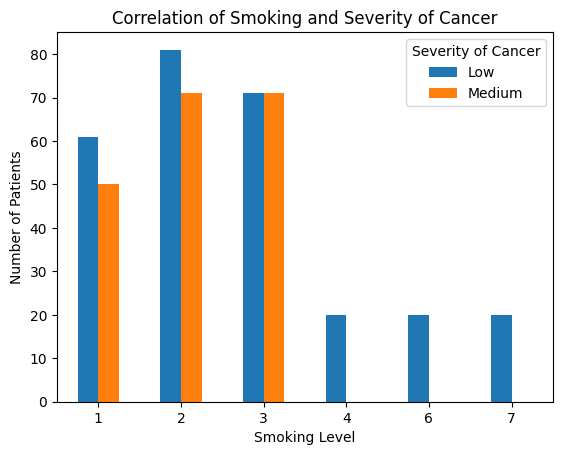

In [49]:
ct1.plot(kind='bar')
plt.xlabel("Smoking Level")
plt.ylabel("Number of Patients")
plt.title("Correlation of Smoking and Severity of Cancer")

plt.legend(title="Severity of Cancer")
plt.xticks(rotation=0)
plt.show()

In [50]:
tstat, pval, dof, efreq = stats.chi2_contingency(ct1)
print(pval)

2.0884732820904753e-09


With a p-value of 0.00000000209, we can reject the null hypothesis since the p-value is much smaller than the significance level of 0.05. With the p-value being very small, we can state that smoking has a strong relationship with lung cancer, as even though many of the patients have low and medium severities of cancer, the patients in this test are controlled by other factors.

Heat Maps with Pearson's Correlation Coefficient for Causes and Symptoms of Chronic Lung Disease

Based on scholarly articles, smoking, air_pollution, and genetic risk are causes of chronic lung disease. Occupational hazards and passive smoking fit in this category as well since the three factors mentioned also affect occupations and passive smoking. Similarly, symptoms such as chest pain, coughing, fatigue, shortness of breath, unintended weight loss, and wheezing are known to be correlated with chronic long disease.

With this, we can produce a correlation chart to identify whether or not chronic lung disease has a strong relationship with the causes and symptoms mentioned.

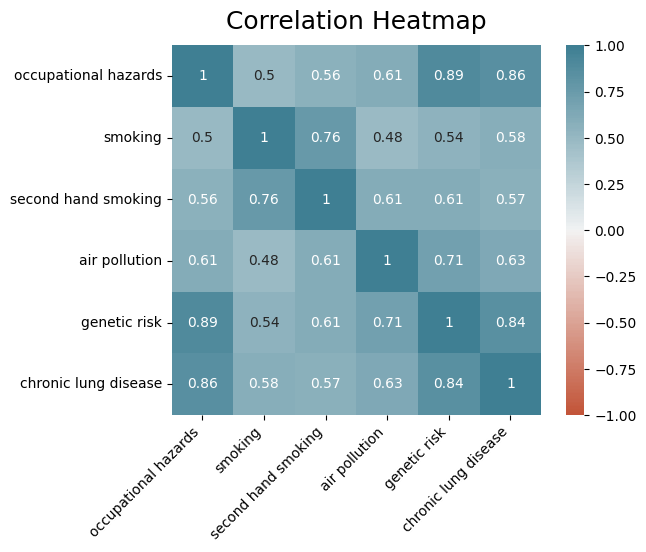

In [60]:
df2 = df[['occupational hazards', 'smoking', 'second hand smoking', 'air pollution', 'genetic risk', 'chronic lung disease']].copy()
corr = df2.corr()
ax = sns.heatmap(
    corr, vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    annot=True,
    square=True
)

ax.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


# plt.figure(figsize=(8,8))
# sns.heatmap(df2.corr(),annot=True,fmt=".00")
# plt.yticks(rotation=0)
# plt.show()

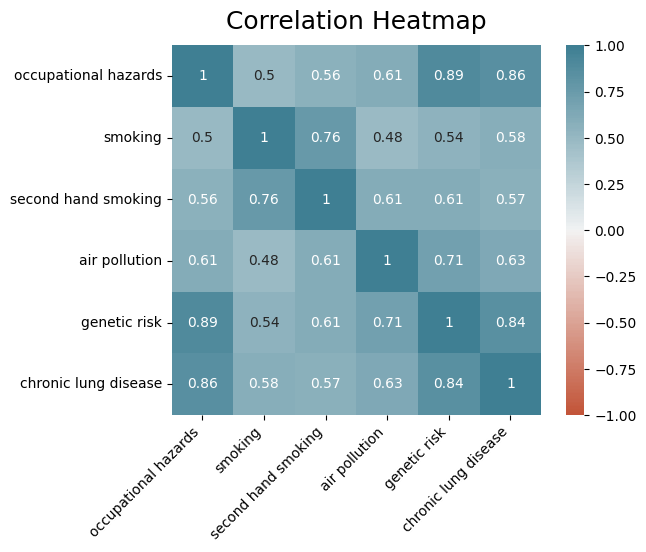

In [61]:
df3 = df[['chest pain', 'coughing of blood', 'fatigue', 'weight loss', 'shortness of breath', 'wheezing', 'dry cough', 'chronic lung disease']].copy()
corr2 = df3.corr()
ax2 = sns.heatmap(
    corr, vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    annot=True,
    square=True
)

ax2.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

ax2.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# plt.figure(figsize=(8,8))
# sns.heatmap(df3.corr(),annot=True,fmt=".00")
# plt.yticks(rotation=0)
# plt.show()

Based on the heat maps, we can see that there is a strong relationship between occupational hazards, smoking, passive smoking, air pollution, genetic risk, and chronic lung disease. Therefore, we can conclude that all of the causes are in direct correlation to chronic lung disease. According to the second heat map, we can see that chest pain and coughing of blood have strong relationships with chronic lung disease. Though the other symptoms do not show a strong relationship, it does not necessarily mean that a patient with chronic lung disease will not present these symptoms. We can use these findings to further look into the correlation between lung cancer and chronic lung disease.

ANOVA Test for Severity of Cancer and Chronic Lung Disease

H0: The severity of cancer does not have a correlation with chronic lung disease.

HA: The severity of cancer does have a correlation with chronic lung disease.

We can run an ANOVA test since there are three groups of severity of cancer.

In [53]:
ct3 = pd.crosstab(df['chronic lung disease'], df['severity of cancer'])
ct3

high = []
medium = []
low = []

for i, j in df.iterrows():

  if j['severity of cancer'] == 'High':
    high.append(j['chronic lung disease'])
  elif j['severity of cancer'] == 'Medium':
    medium.append(j['chronic lung disease'])
  else:
    low.append(j['chronic lung disease'])

stat, pval = stats.f_oneway(high, medium, low)
pval

4.939473195845556e-107

We ran an anova test on the the high, medium, and low groups for the correlation between severity of cancer and chronic lung disease. The p-value is much lower than the standard alpha of 0.05. So we reject the null hypothesis and this shows that there is a high correlation between chronic lung disease and severity of cancer groups. 

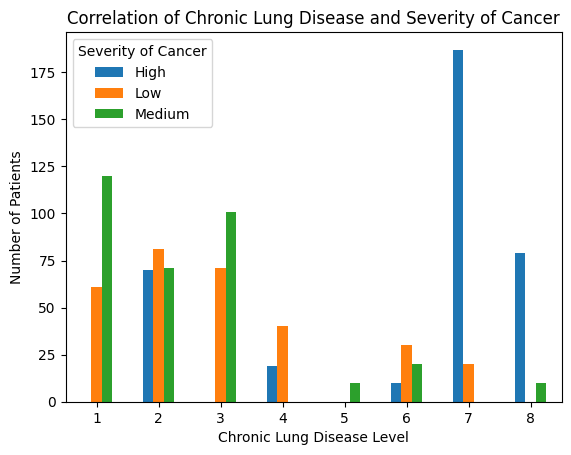

In [54]:
ct.plot(kind='bar')
plt.xlabel("Chronic Lung Disease Level")
plt.ylabel("Number of Patients")
plt.title("Correlation of Chronic Lung Disease and Severity of Cancer")

plt.legend(title="Severity of Cancer")
plt.xticks(rotation=0)
plt.show()

Based on the three statistical methods, we found that the chi-square test was the most useful as everything is categorical data. Smoking and chronic lung disease were the most impactful on the severity of cancer. Those were also our key factors in the dataframe.

In [175]:
# Male = 0, Female = 1
df['gender'] = df['gender'].apply(lambda x: 0 if x == 'male' else 1)

X = np.array(df.drop(df.columns[[0, 1, 5, 10, 11, 12, 21, 22, 24, 25]], axis=1))
y = np.array(df['severity of cancer'])
seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=seed)
randomforest = RandomForestClassifier()
kneighbors = KNeighborsClassifier()
arr = []
# Elbow Method testing to find k
for k_folds in range(2, 30):
    skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=seed)

    cv = cross_val_score(kneighbors, X_train, np.ravel(y_train), cv=skf)
    arr.append(cv.mean())
    # print(f'{k_folds}: {cv.mean()}')

kneighbors.fit(X_train, np.ravel(y_train))
y_pred = kneighbors.predict(X_test)
print(f'Accuracy: {accuracy_score(y_pred, y_test)}')
print(classification_report(y_test, y_pred))

Accuracy: 0.984
              precision    recall  f1-score   support

        High       0.96      1.00      0.98       180
         Low       1.00      0.99      1.00       147
      Medium       0.99      0.96      0.98       173

    accuracy                           0.98       500
   macro avg       0.99      0.98      0.98       500
weighted avg       0.98      0.98      0.98       500



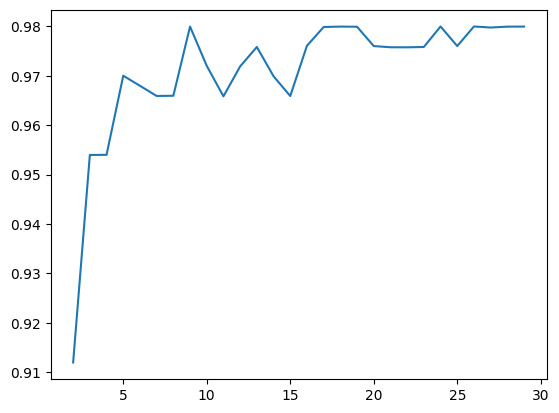

In [176]:
plt.plot(range(2,30), np.array(arr))
plt.show()

Scholarly Articles mentioned above: https://www.mdpi.com/2227-9059/11/2/448, https://www.mayoclinic.org/diseases-conditions/copd/symptoms-causes/syc-20353679